In [2]:
import numpy as np
import pandas as pd
import os
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
radiomics_features = pd.read_csv('p10_18000_clean_radiomics_table.csv')
all_chexpert_labels = pd.read_csv('mimic-cxr-2.0.0-chexpert.csv')

In [4]:
radiomics_features.head(10)

,jpg_path,subject_id,study_id,shape2D Elongation,shape2D MajorAxisLength,shape2D MaximumDiameter,shape2D MeshSurface,shape2D MinorAxisLength,shape2D Perimeter,shape2D PerimeterSurfaceRatio,...,glszm SmallAreaHighGrayLevelEmphasis,glszm SmallAreaLowGrayLevelEmphasis,glszm ZoneEntropy,glszm ZonePercentage,glszm ZoneVariance,ngtdm Busyness,ngtdm Coarseness,ngtdm Complexity,ngtdm Contrast,ngtdm Strength
0,..\..\physionet.org\files\mimic-cxr-jpg\2.0.0\...,10000032,50414267,0.934868,2866.410907,3429.236796,5760008.5,2679.716522,26432.856403,0.004589,...,37.273906,0.045821,5.813244,0.012650,1.750311e+07,1653.213196,0.000016,4.689005,0.018855,0.000606
1,..\..\physionet.org\files\mimic-cxr-jpg\2.0.0\...,10000032,50414267,0.816265,3025.202847,3415.972482,5592116.5,2469.367274,25352.954457,0.004534,...,36.981641,0.046984,5.931355,0.009508,2.968429e+07,1234.448002,0.000021,3.583756,0.014356,0.000808
2,..\..\physionet.org\files\mimic-cxr-jpg\2.0.0\...,10000032,53189527,0.817480,3524.544132,3949.574661,7614607.0,2881.245636,24943.143633,0.003276,...,43.122088,0.038682,5.605748,0.015339,1.798596e+07,2322.649971,0.000011,5.035189,0.020470,0.000425
3,..\..\physionet.org\files\mimic-cxr-jpg\2.0.0\...,10000032,53189527,0.808116,3521.200540,3930.009796,7506048.5,2845.536774,26578.467950,0.003541,...,27.000230,0.113680,5.632177,0.013469,3.027554e+07,2043.550204,0.000013,4.697150,0.015898,0.000500
4,..\..\physionet.org\files\mimic-cxr-jpg\2.0.0\...,10000032,53911762,0.963340,3027.271187,3667.158709,6606043.0,2916.290592,28486.507848,0.004312,...,31.030022,0.050642,6.153243,0.009395,2.780247e+07,1634.604570,0.000016,4.151006,0.016018,0.000609
5,..\..\physionet.org\files\mimic-cxr-jpg\2.0.0\...,10000032,53911762,0.814340,3075.834682,3596.931053,5781030.5,2504.776108,38121.019669,0.006594,...,20.549927,0.122543,6.354435,0.007017,3.175696e+07,1229.287418,0.000021,3.590656,0.013720,0.000803
6,..\..\physionet.org\files\mimic-cxr-jpg\2.0.0\...,10000032,56699142,0.910706,3179.113581,3752.247860,6903602.5,2895.238999,30098.267658,0.004360,...,27.133365,0.053790,6.630816,0.006549,3.729804e+07,1341.154078,0.000019,3.161370,0.012634,0.000746
7,..\..\physionet.org\files\mimic-cxr-jpg\2.0.0\...,10000764,57375967,0.726072,3492.988020,3767.992171,6652991.0,2536.159877,21439.295660,0.003223,...,21.914963,0.048459,5.937132,0.013935,2.309636e+07,1997.216580,0.000013,4.795276,0.019354,0.000504
8,..\..\physionet.org\files\mimic-cxr-jpg\2.0.0\...,10000764,57375967,0.831356,3525.263335,3975.674157,7743993.0,2930.749195,28471.013542,0.003677,...,41.278788,0.020452,5.462720,0.016758,3.837558e+07,2428.745565,0.000011,5.287395,0.019113,0.000397
9,..\..\physionet.org\files\mimic-cxr-jpg\2.0.0\...,10000764,57375967,0.831164,3524.583016,3975.674157,7743262.0,2929.505735,21704.428560,0.002803,...,33.921237,0.029179,5.659317,0.012489,3.457032e+07,1895.811574,0.000013,3.977913,0.014674,0.000516


In [5]:
def extract_labels(input_features, all_labels):
    output_labels = pd.DataFrame(columns = list(all_labels))
    
    for _, c_row in input_features.iterrows():
        output_labels = output_labels.append(all_labels.loc[(all_labels['subject_id'] == int(c_row['subject_id'])) & (all_labels['study_id'] == int(c_row['study_id']))], ignore_index=True)
    return output_labels

In [6]:
chexpert_labels = extract_labels(radiomics_features, all_chexpert_labels)

In [30]:
chexpert_labels.head(10)

,subject_id,study_id,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices
0,10000032,50414267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,10000032,50414267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,10000032,53189527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,10000032,53189527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,10000032,53911762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
5,10000032,53911762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
6,10000032,56699142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
7,10000764,57375967,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN
8,10000764,57375967,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN
9,10000764,57375967,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN


In [13]:
import pandas as pd
from sklearn import preprocessing

df = radiomics_features.drop(['jpg_path', 'subject_id', 'study_id'], axis=1)
normalized_df=(df-df.mean())/df.std()

In [18]:
radiomics_features[['jpg_path', 'subject_id', 'study_id']]

,jpg_path,subject_id,study_id
0,..\..\physionet.org\files\mimic-cxr-jpg\2.0.0\...,10000032,50414267
1,..\..\physionet.org\files\mimic-cxr-jpg\2.0.0\...,10000032,50414267
2,..\..\physionet.org\files\mimic-cxr-jpg\2.0.0\...,10000032,53189527
3,..\..\physionet.org\files\mimic-cxr-jpg\2.0.0\...,10000032,53189527
4,..\..\physionet.org\files\mimic-cxr-jpg\2.0.0\...,10000032,53911762
...,...,...,...
17995,..\..\physionet.org\files\mimic-cxr-jpg\2.0.0\...,10490732,58074955
17996,..\..\physionet.org\files\mimic-cxr-jpg\2.0.0\...,10490874,51592271
17997,..\..\physionet.org\files\mimic-cxr-jpg\2.0.0\...,10490874,51592271
17998,..\..\physionet.org\files\mimic-cxr-jpg\2.0.0\...,10490874,51592271


In [26]:
normalized_radiomics_features = pd.concat([radiomics_features[['jpg_path', 'subject_id', 'study_id']], normalized_df], axis=1)

In [27]:
normalized_radiomics_features

,jpg_path,subject_id,study_id,shape2D Elongation,shape2D MajorAxisLength,shape2D MaximumDiameter,shape2D MeshSurface,shape2D MinorAxisLength,shape2D Perimeter,shape2D PerimeterSurfaceRatio,...,glszm SmallAreaHighGrayLevelEmphasis,glszm SmallAreaLowGrayLevelEmphasis,glszm ZoneEntropy,glszm ZonePercentage,glszm ZoneVariance,ngtdm Busyness,ngtdm Coarseness,ngtdm Complexity,ngtdm Contrast,ngtdm Strength
0,..\..\physionet.org\files\mimic-cxr-jpg\2.0.0\...,10000032,50414267,1.397774,-0.553454,-0.283765,-0.333459,0.102000,0.259508,0.224278,...,0.469026,0.606562,0.265351,-0.482227,-0.296245,-0.409702,0.262963,-0.282344,-0.326237,0.229592
1,..\..\physionet.org\files\mimic-cxr-jpg\2.0.0\...,10000032,50414267,-0.442464,-0.225780,-0.309413,-0.431931,-0.429441,0.164448,0.206073,...,0.422591,0.667439,0.657066,-0.783237,0.547551,-0.897028,1.362127,-0.830443,-0.874412,1.276356
2,..\..\physionet.org\files\mimic-cxr-jpg\2.0.0\...,10000032,53189527,-0.423607,0.804629,0.722385,0.754298,0.611157,0.128374,-0.207793,...,1.398172,0.232958,-0.422803,-0.224749,-0.262797,0.369337,-0.623140,-0.110670,-0.129462,-0.709803
3,..\..\physionet.org\files\mimic-cxr-jpg\2.0.0\...,10000032,53189527,-0.568911,0.797730,0.684553,0.690626,0.520940,0.272325,-0.120531,...,-1.163234,4.157835,-0.335152,-0.403825,0.588507,0.044542,-0.359680,-0.278305,-0.686578,-0.320484
4,..\..\physionet.org\files\mimic-cxr-jpg\2.0.0\...,10000032,53911762,1.839535,-0.221512,0.176292,0.162756,0.699697,0.440283,0.133201,...,-0.522989,0.858840,1.392954,-0.793992,0.417196,-0.431357,0.319736,-0.549141,-0.671917,0.246400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,..\..\physionet.org\files\mimic-cxr-jpg\2.0.0\...,10490732,58074955,0.004290,0.621392,0.628954,0.673639,0.667145,0.173525,-0.165403,...,1.379853,-0.426904,-0.524347,-0.493303,0.302112,-0.167865,-0.085196,-0.644447,-0.636739,-0.145768
17996,..\..\physionet.org\files\mimic-cxr-jpg\2.0.0\...,10490874,51592271,-0.089727,0.749297,0.770129,0.802048,0.745934,-0.066633,-0.313892,...,-0.174770,-0.079224,0.320630,-0.490079,0.049902,0.139860,-0.435647,-0.501353,-0.440694,-0.461672
17997,..\..\physionet.org\files\mimic-cxr-jpg\2.0.0\...,10490874,51592271,-0.407300,0.769598,0.711372,0.719210,0.585408,-0.013923,-0.269654,...,-1.277313,0.065463,0.807550,-0.601424,0.434071,0.104925,-0.469845,-0.428446,-0.439308,-0.415782
17998,..\..\physionet.org\files\mimic-cxr-jpg\2.0.0\...,10490874,51592271,-0.556642,0.636989,0.517232,0.509457,0.368781,0.100636,-0.159690,...,-0.790682,0.044379,0.310517,-0.270070,-0.395642,0.481418,-0.827492,0.066579,0.059441,-0.767628


In [42]:
chexpert_labels

,subject_id,study_id,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices
0,10000032,50414267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,10000032,50414267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,10000032,53189527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,10000032,53189527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,10000032,53911762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,10490732,58074955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
17996,10490874,51592271,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,1.0,0.0,NaN,NaN,0.0,NaN
17997,10490874,51592271,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,1.0,0.0,NaN,NaN,0.0,NaN
17998,10490874,51592271,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,1.0,0.0,NaN,NaN,0.0,NaN


In [89]:
def group(features, labels, name):
    disease_features_labels = pd.concat([features, labels[[name]]], axis=1)
    disease_features_positive = disease_features_labels.loc[disease_features_labels[name] == 1.0]
    disease_features_negative = disease_features_labels.loc[disease_features_labels[name] == 0.0]
    disease_features_uncertain = disease_features_labels.loc[disease_features_labels[name] == -1.0]
    disease_features_labels = pd.concat([disease_features_positive, disease_features_negative, disease_features_uncertain], axis=0, ignore_index=True)
    return disease_features_labels, disease_features_positive, disease_features_negative, disease_features_uncertain
    #return disease_features_labels

In [90]:
Consolidation_features_labels, Consolidation_features_postive, Consolidation_features_negative, Consolidation_features_uncertain = group(normalized_radiomics_features, chexpert_labels, 'Consolidation')

In [91]:
Consolidation_features_labels.fillna(0, inplace=True)
Consolidation_features_labels.shape

(1676, 106)

In [92]:
Consolidation_features_labels

,jpg_path,subject_id,study_id,shape2D Elongation,shape2D MajorAxisLength,shape2D MaximumDiameter,shape2D MeshSurface,shape2D MinorAxisLength,shape2D Perimeter,shape2D PerimeterSurfaceRatio,...,glszm SmallAreaLowGrayLevelEmphasis,glszm ZoneEntropy,glszm ZonePercentage,glszm ZoneVariance,ngtdm Busyness,ngtdm Coarseness,ngtdm Complexity,ngtdm Contrast,ngtdm Strength,Consolidation
0,..\..\physionet.org\files\mimic-cxr-jpg\2.0.0\...,10000764,57375967,-1.841896,0.739512,0.371268,0.190292,-0.260691,-0.180057,-0.225292,...,0.744600,0.676223,-0.359212,0.091202,-0.009377,-0.341250,-0.229644,-0.265417,-0.301051,1.0
1,..\..\physionet.org\files\mimic-cxr-jpg\2.0.0\...,10000764,57375967,-0.208312,0.806113,0.772852,0.830185,0.736226,0.438919,-0.075924,...,-0.721082,-0.897154,-0.088804,1.149600,0.492802,-0.759241,0.014401,-0.294853,-0.852491,1.0
2,..\..\physionet.org\files\mimic-cxr-jpg\2.0.0\...,10000764,57375967,-0.211296,0.804709,0.772852,0.829756,0.733085,-0.156719,-0.363301,...,-0.264378,-0.245142,-0.497685,0.886008,-0.127385,-0.182686,-0.634978,-0.835658,-0.236006,1.0
3,..\..\physionet.org\files\mimic-cxr-jpg\2.0.0\...,10002428,58581921,2.298598,-2.288229,-2.127728,-1.919060,-1.586477,-0.565489,0.550819,...,-0.358101,0.000458,0.030163,-1.108129,-1.037169,1.791528,0.286752,0.292565,1.757275,1.0
4,..\..\physionet.org\files\mimic-cxr-jpg\2.0.0\...,10002428,58581921,-3.768897,-1.583603,-1.638597,-2.322866,-3.068610,0.072362,2.091336,...,0.318233,0.248891,1.099635,-1.348154,-0.803835,1.050036,1.760918,1.743535,1.099673,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,..\..\physionet.org\files\mimic-cxr-jpg\2.0.0\...,10478422,53964418,-0.403470,0.766782,0.680072,0.714909,0.584773,-0.016823,-0.270103,...,-0.184077,0.642374,-0.787814,1.548194,-0.349592,0.130377,-0.765669,-0.984719,0.081270,-1.0
1672,..\..\physionet.org\files\mimic-cxr-jpg\2.0.0\...,10478422,53964418,-0.194889,0.811079,0.772852,0.843070,0.748991,-0.373513,-0.470329,...,-0.615934,0.061869,-0.168924,0.087072,0.481715,-0.754465,-0.163678,-0.138956,-0.760981,-1.0
1673,..\..\physionet.org\files\mimic-cxr-jpg\2.0.0\...,10486632,55512706,-0.289717,0.795261,0.772852,0.792600,0.678522,-0.098648,-0.327435,...,-0.356366,-0.076999,0.105621,-0.203372,0.835519,-1.008376,0.115062,0.207656,-1.003377,-1.0
1674,..\..\physionet.org\files\mimic-cxr-jpg\2.0.0\...,10489449,54249112,2.387230,-1.656773,-1.390824,-1.319996,-0.785179,0.037204,0.643252,...,7.722232,-1.608879,0.738436,-0.891717,0.895362,-1.199089,3.229084,1.551495,-0.760576,-1.0


In [75]:
Consolidation_features_postive.fillna(0, inplace=True)
Consolidation_features_postive.shape

(741, 106)

In [76]:
Consolidation_features_negative.fillna(0, inplace=True)
Consolidation_features_negative.shape

(631, 106)

In [77]:
Consolidation_features_uncertain.fillna(0, inplace=True)
Consolidation_features_uncertain.shape

(304, 106)

Index(['shape2D Elongation', 'shape2D MajorAxisLength',
       'shape2D MaximumDiameter', 'shape2D MeshSurface',
       'shape2D MinorAxisLength', 'shape2D Perimeter',
       'shape2D PerimeterSurfaceRatio', 'shape2D PixelSurface',
       'shape2D Sphericity', 'firstorder 10Percentile',
       ...
       'glszm SmallAreaHighGrayLevelEmphasis',
       'glszm SmallAreaLowGrayLevelEmphasis', 'glszm ZoneEntropy',
       'glszm ZonePercentage', 'glszm ZoneVariance', 'ngtdm Busyness',
       'ngtdm Coarseness', 'ngtdm Complexity', 'ngtdm Contrast',
       'ngtdm Strength'],
      dtype='object', length=102)


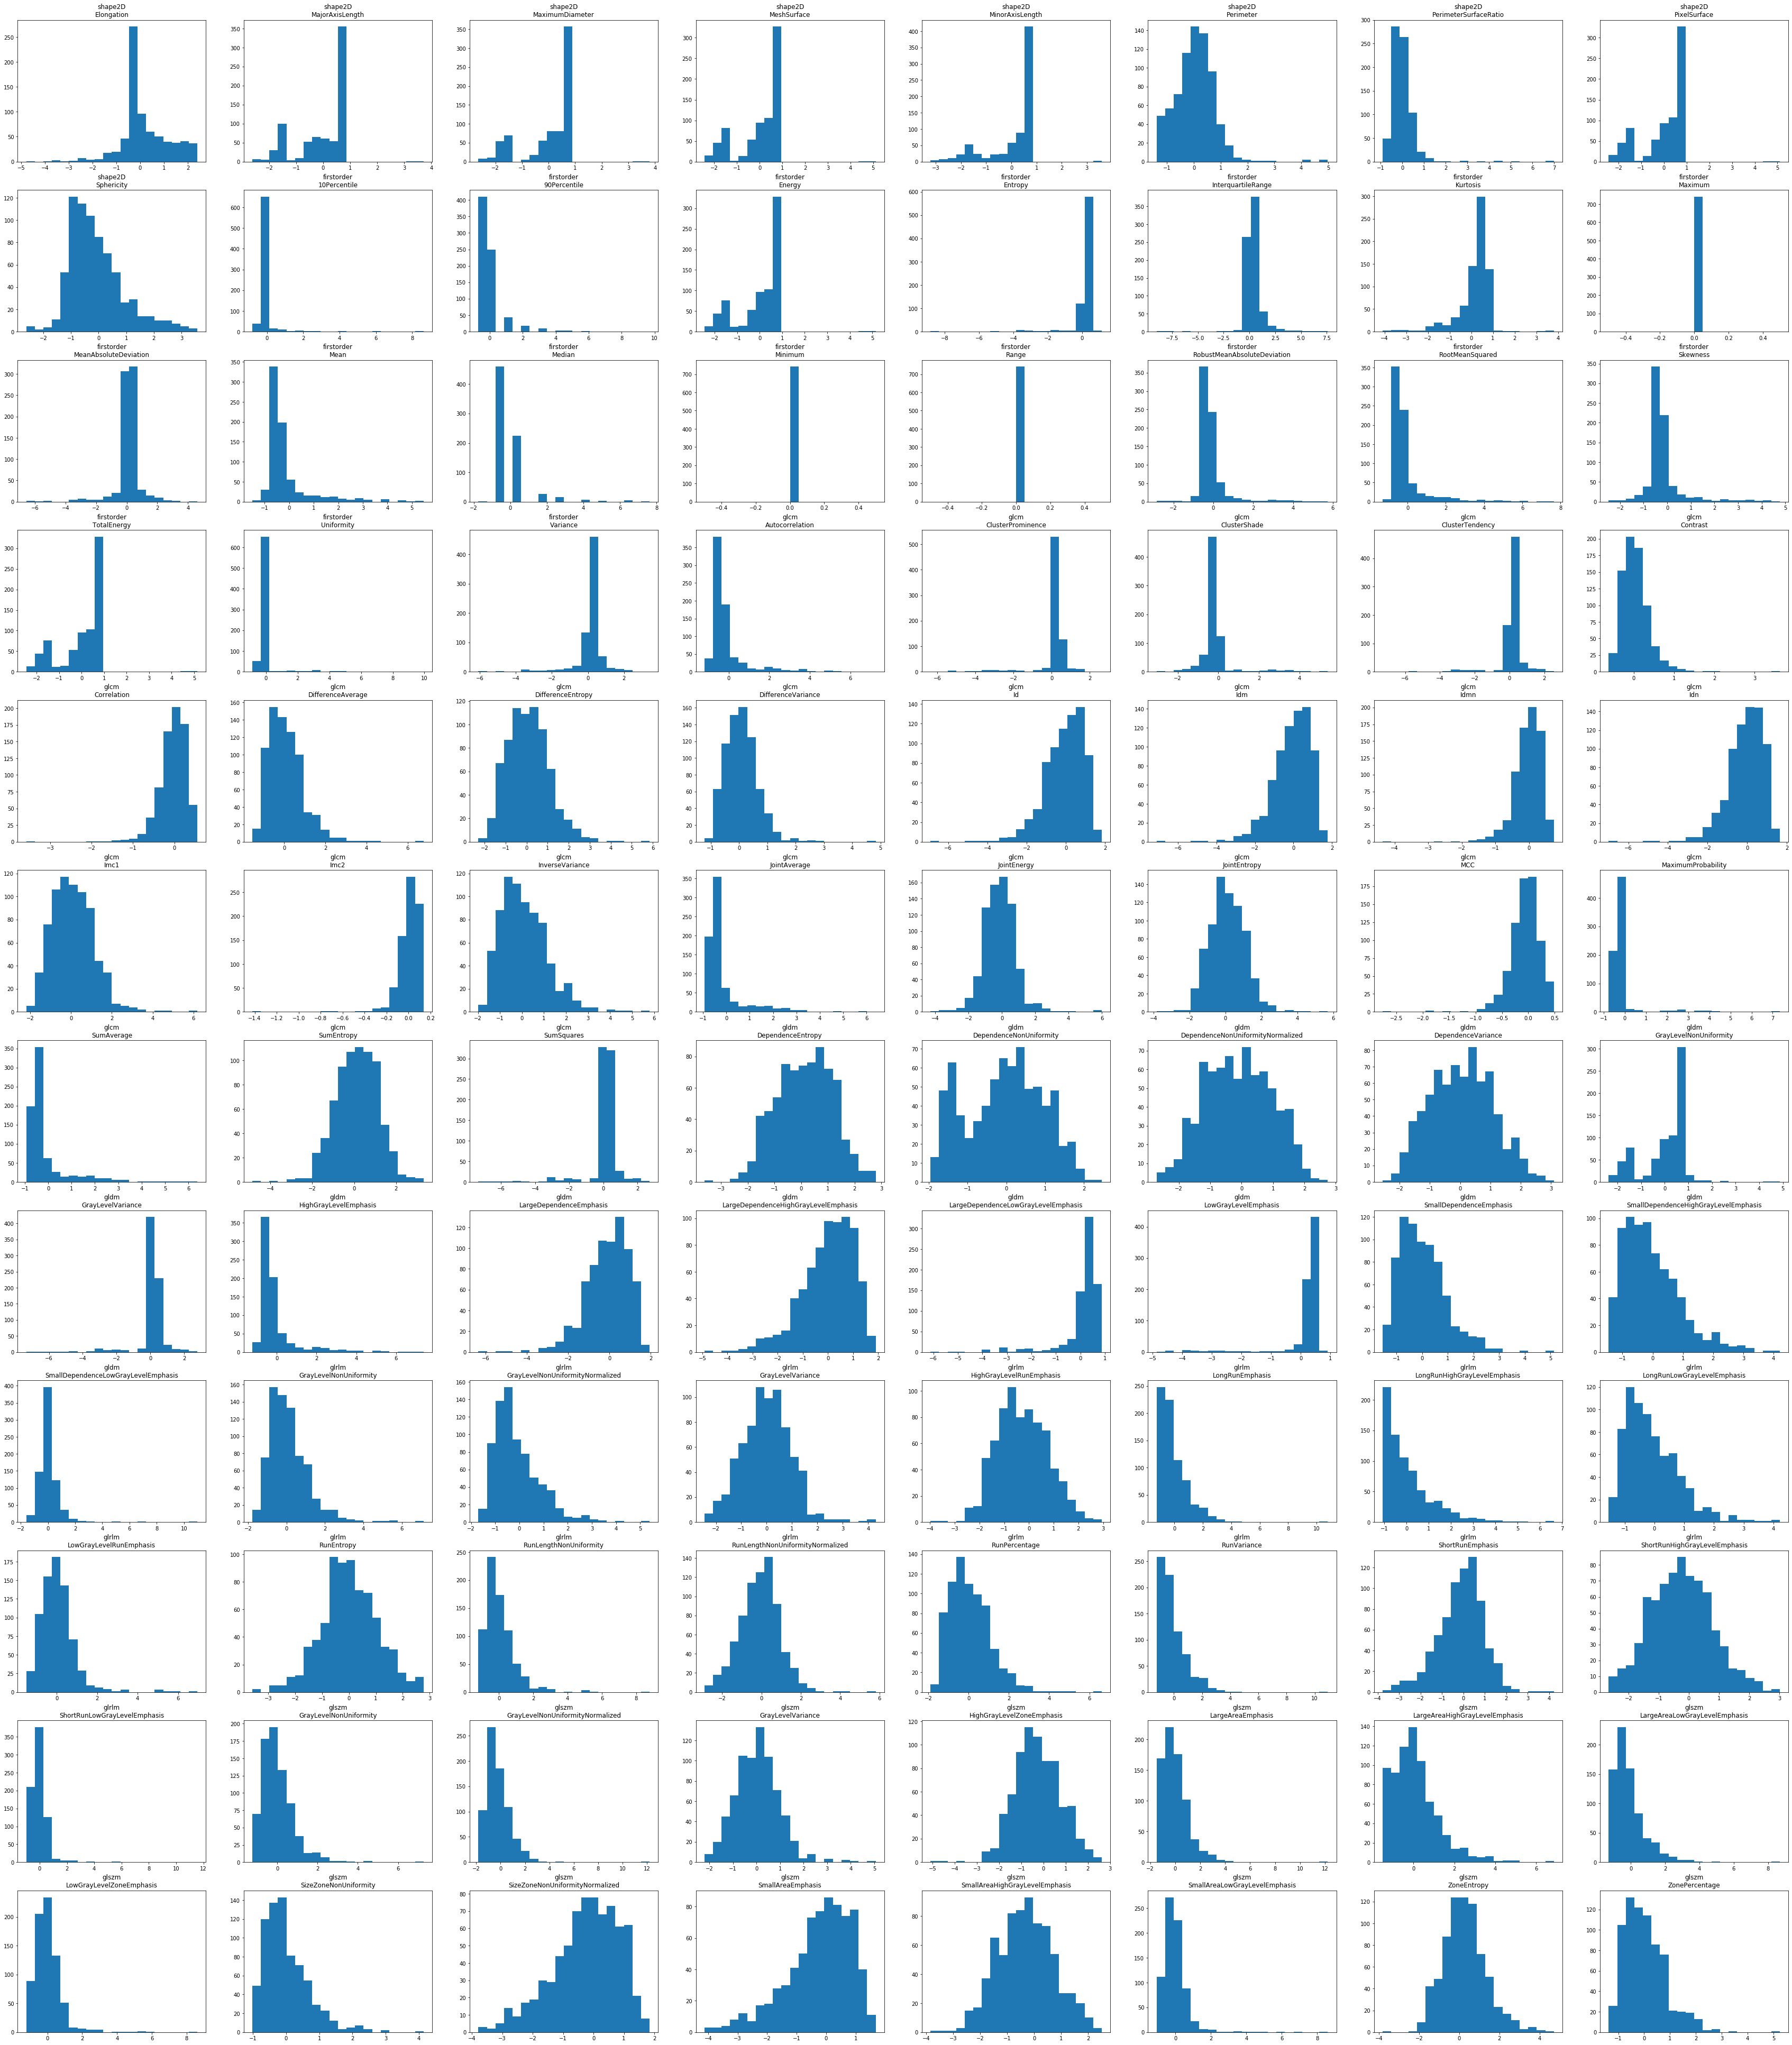

In [72]:
fig, m_axs = plt.subplots(12, 8, figsize=(60, 70))
clean_col_names = Consolidation_features_postive.columns[3:-1]
for c_ax, c_var in zip(m_axs.flatten(), clean_col_names):
    c_ax.hist(Consolidation_features_postive[c_var].values, bins=20)
    c_ax.set_title('\n'.join(c_var.split(' ')))
fig.savefig('p10_Consolidation_Positive_all_metrics.png')

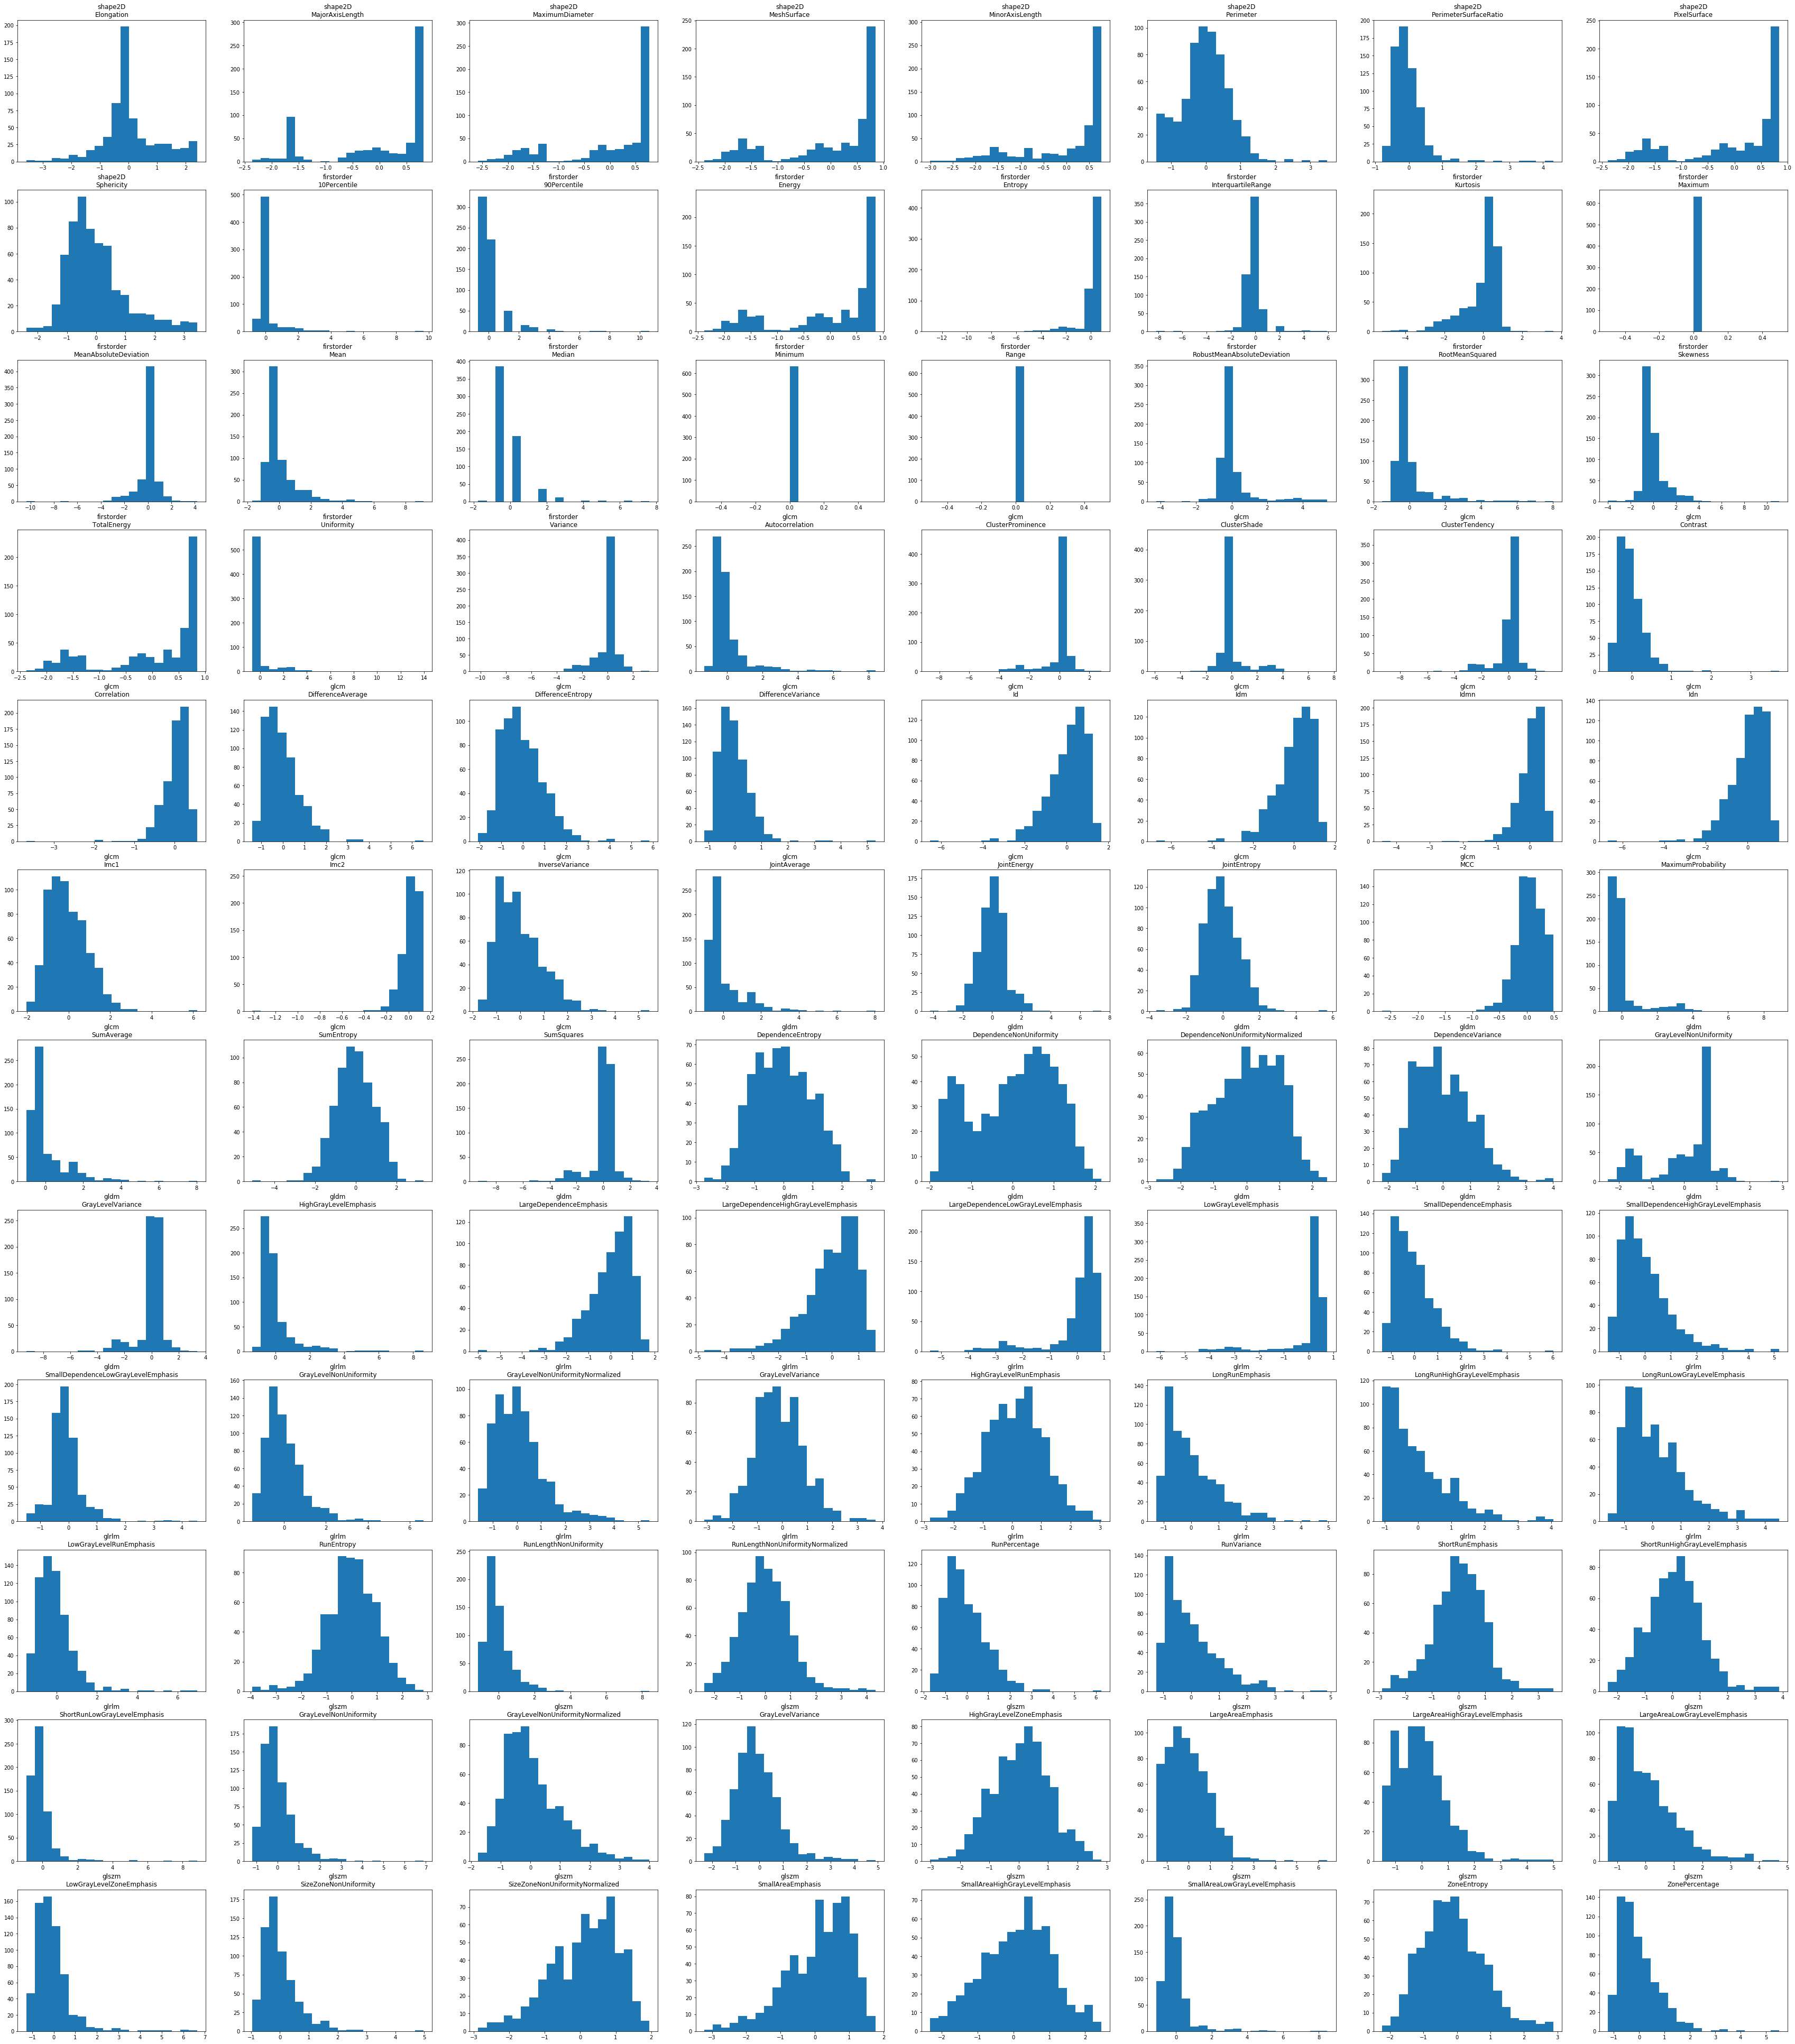

In [79]:
fig, m_axs = plt.subplots(12, 8, figsize=(60, 70))
clean_col_names = Consolidation_features_negative.columns[3:-1]
for c_ax, c_var in zip(m_axs.flatten(), clean_col_names):
    c_ax.hist(Consolidation_features_negative[c_var].values, bins=20)
    c_ax.set_title('\n'.join(c_var.split(' ')))
fig.savefig('p10_Consolidation_negative_all_metrics.png')

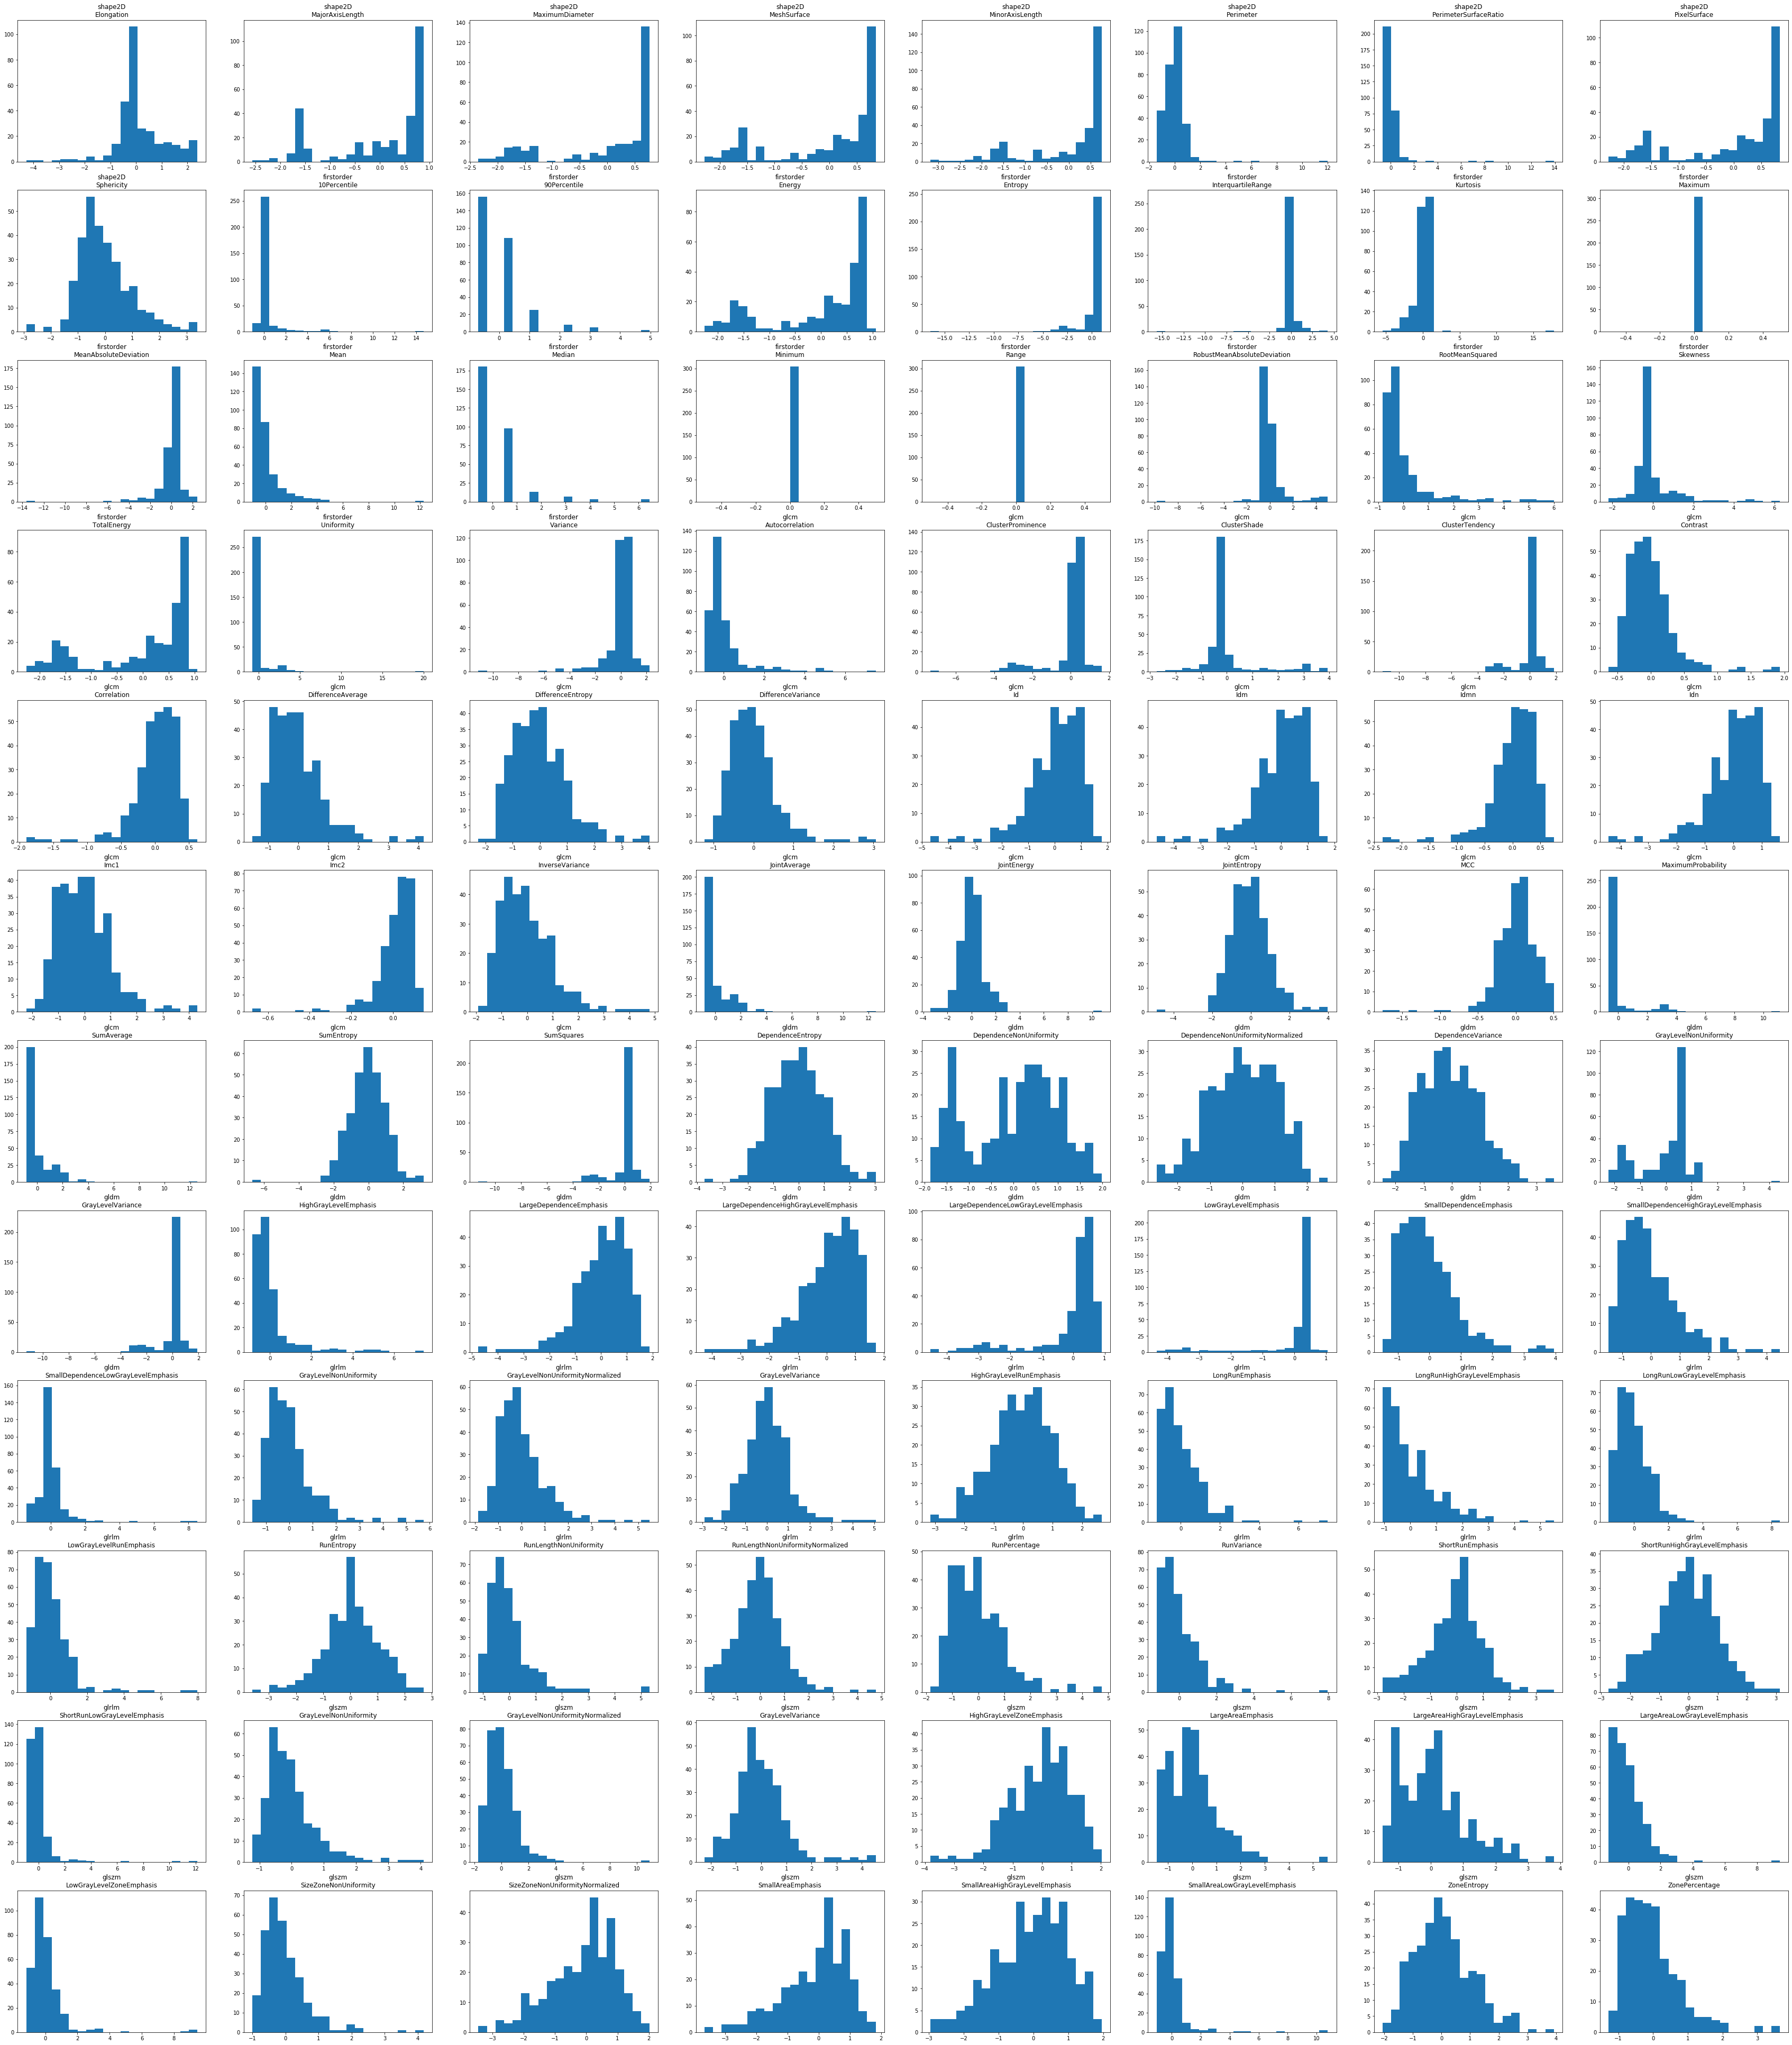

In [80]:
fig, m_axs = plt.subplots(12, 8, figsize=(60, 70))
clean_col_names = Consolidation_features_uncertain.columns[3:-1]
for c_ax, c_var in zip(m_axs.flatten(), clean_col_names):
    c_ax.hist(Consolidation_features_uncertain[c_var].values, bins=20)
    c_ax.set_title('\n'.join(c_var.split(' ')))
fig.savefig('p10_Consolidation_uncertain_all_metrics.png')

In [81]:
import seaborn as sns

In [101]:
Consolidation_features_labels.columns[3:-1]

Index(['shape2D Elongation', 'shape2D MajorAxisLength',
       'shape2D MaximumDiameter', 'shape2D MeshSurface',
       'shape2D MinorAxisLength', 'shape2D Perimeter',
       'shape2D PerimeterSurfaceRatio', 'shape2D PixelSurface',
       'shape2D Sphericity', 'firstorder 10Percentile',
       ...
       'glszm SmallAreaHighGrayLevelEmphasis',
       'glszm SmallAreaLowGrayLevelEmphasis', 'glszm ZoneEntropy',
       'glszm ZonePercentage', 'glszm ZoneVariance', 'ngtdm Busyness',
       'ngtdm Coarseness', 'ngtdm Complexity', 'ngtdm Contrast',
       'ngtdm Strength'],
      dtype='object', length=102)

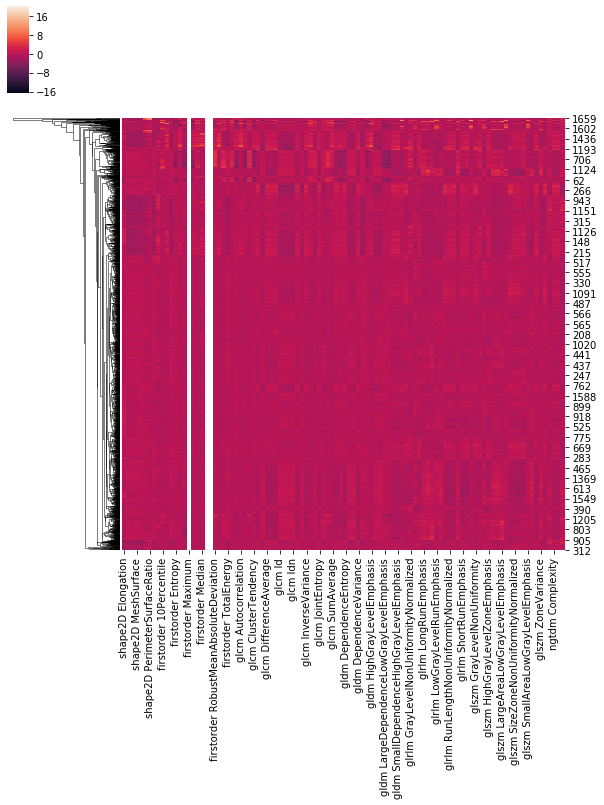

In [103]:
pp = sns.clustermap(Consolidation_features_labels[Consolidation_features_labels.columns[3:-1]], col_cluster=False, metric='chebyshev', z_score=1)
_ = plt.setp(pp.ax_heatmap.get_yticklabels(), rotation=0)
plt.show()

In [9]:
chexpert_labels.fillna(0, inplace=True)

In [12]:
radiomics_features.head(10)

,jpg_path,subject_id,study_id,shape2D Elongation,shape2D MajorAxisLength,shape2D MaximumDiameter,shape2D MeshSurface,shape2D MinorAxisLength,shape2D Perimeter,shape2D PerimeterSurfaceRatio,...,glszm SmallAreaHighGrayLevelEmphasis,glszm SmallAreaLowGrayLevelEmphasis,glszm ZoneEntropy,glszm ZonePercentage,glszm ZoneVariance,ngtdm Busyness,ngtdm Coarseness,ngtdm Complexity,ngtdm Contrast,ngtdm Strength
0,..\..\physionet.org\files\mimic-cxr-jpg\2.0.0\...,10000032,50414267,0.934868,2866.410907,3429.236796,5760008.5,2679.716522,26432.856403,0.004589,...,37.273906,0.045821,5.813244,0.012650,1.750311e+07,1653.213196,0.000016,4.689005,0.018855,0.000606
1,..\..\physionet.org\files\mimic-cxr-jpg\2.0.0\...,10000032,50414267,0.816265,3025.202847,3415.972482,5592116.5,2469.367274,25352.954457,0.004534,...,36.981641,0.046984,5.931355,0.009508,2.968429e+07,1234.448002,0.000021,3.583756,0.014356,0.000808
2,..\..\physionet.org\files\mimic-cxr-jpg\2.0.0\...,10000032,53189527,0.817480,3524.544132,3949.574661,7614607.0,2881.245636,24943.143633,0.003276,...,43.122088,0.038682,5.605748,0.015339,1.798596e+07,2322.649971,0.000011,5.035189,0.020470,0.000425
3,..\..\physionet.org\files\mimic-cxr-jpg\2.0.0\...,10000032,53189527,0.808116,3521.200540,3930.009796,7506048.5,2845.536774,26578.467950,0.003541,...,27.000230,0.113680,5.632177,0.013469,3.027554e+07,2043.550204,0.000013,4.697150,0.015898,0.000500
4,..\..\physionet.org\files\mimic-cxr-jpg\2.0.0\...,10000032,53911762,0.963340,3027.271187,3667.158709,6606043.0,2916.290592,28486.507848,0.004312,...,31.030022,0.050642,6.153243,0.009395,2.780247e+07,1634.604570,0.000016,4.151006,0.016018,0.000609
5,..\..\physionet.org\files\mimic-cxr-jpg\2.0.0\...,10000032,53911762,0.814340,3075.834682,3596.931053,5781030.5,2504.776108,38121.019669,0.006594,...,20.549927,0.122543,6.354435,0.007017,3.175696e+07,1229.287418,0.000021,3.590656,0.013720,0.000803
6,..\..\physionet.org\files\mimic-cxr-jpg\2.0.0\...,10000032,56699142,0.910706,3179.113581,3752.247860,6903602.5,2895.238999,30098.267658,0.004360,...,27.133365,0.053790,6.630816,0.006549,3.729804e+07,1341.154078,0.000019,3.161370,0.012634,0.000746
7,..\..\physionet.org\files\mimic-cxr-jpg\2.0.0\...,10000764,57375967,0.726072,3492.988020,3767.992171,6652991.0,2536.159877,21439.295660,0.003223,...,21.914963,0.048459,5.937132,0.013935,2.309636e+07,1997.216580,0.000013,4.795276,0.019354,0.000504
8,..\..\physionet.org\files\mimic-cxr-jpg\2.0.0\...,10000764,57375967,0.831356,3525.263335,3975.674157,7743993.0,2930.749195,28471.013542,0.003677,...,41.278788,0.020452,5.462720,0.016758,3.837558e+07,2428.745565,0.000011,5.287395,0.019113,0.000397
9,..\..\physionet.org\files\mimic-cxr-jpg\2.0.0\...,10000764,57375967,0.831164,3524.583016,3975.674157,7743262.0,2929.505735,21704.428560,0.002803,...,33.921237,0.029179,5.659317,0.012489,3.457032e+07,1895.811574,0.000013,3.977913,0.014674,0.000516


In [11]:
chexpert_labels.head(10)

,subject_id,study_id,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices
0,10000032,50414267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,10000032,50414267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,10000032,53189527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,10000032,53189527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,10000032,53911762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,10000032,53911762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,10000032,56699142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,10000764,57375967,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0
8,10000764,57375967,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0
9,10000764,57375967,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0


In [13]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

In [20]:
X = radiomics_features.values[:,3:]
Y = chexpert_labels.values[:,2:]

In [22]:
X.shape

(200, 102)

In [23]:
Y.shape

(200, 14)

In [35]:
from sklearn.linear_model import Lasso
clf = Lasso(alpha=0.1)
clf.fit(X,Y)

C:\Users\hanya\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.1580797412526, tolerance: 0.0022720000000000006
  positive)
C:\Users\hanya\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.803309906408554, tolerance: 0.002112000000000001
  positive)
C:\Users\hanya\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.136643316771561, tolerance: 0.0009919999999999996
  positive)
C:\Users\hanya\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [36]:
print(clf.coef_)

[[-0.          0.         -0.00020557 ... -0.         -0.
   0.        ]
 [ 0.         -0.00059552  0.00093252 ... -0.          0.
   0.        ]
 [ 0.         -0.00102767  0.00094294 ...  0.          0.
  -0.        ]
 ...
 [ 0.         -0.00069715  0.00059606 ... -0.         -0.
   0.        ]
 [ 0.         -0.00015375  0.         ...  0.          0.
  -0.        ]
 [ 0.         -0.00031615  0.00012469 ...  0.          0.
  -0.        ]]


In [38]:
print(clf.intercept_)

[ 0.15530531 -1.04836841  1.40647932 -3.09113627  0.57491154 -0.2390753
  0.07793046  5.04602724  6.6445967   3.5587109  -0.20734533  2.87387727
  0.82015419 -3.38022587]
